# **QUADRATIC DISCRIMINANT ANALYSIS**

**Binary class QDA**

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/data6.csv',header=None)
#normalised the data
for column in df.columns[0:3]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])


total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

In [ ]:
import numpy as np

def qda(X_train, Y_train):
    # Adjust class labels to start from 0
    classes = np.unique(Y_train)
    class_mapping = {c: i for i, c in enumerate(classes)}
    Y_train_mapped = np.array([class_mapping[c] for c in Y_train])

    # Calculate parameters for each class
    n_classes = len(classes)

    means = [np.mean(X_train[Y_train_mapped == c], axis=0) for c in range(n_classes)]
    cov_matrices = [np.cov(X_train[Y_train_mapped == c], rowvar=False) for c in range(n_classes)]
    cov_invs = [np.linalg.inv(cov) for cov in cov_matrices]
    priors = [np.mean(Y_train_mapped == c) for c in range(n_classes)]

    # QDA implementation
    def quadratic_discriminant_function(x, class_idx):
        mean_diff = x - means[class_idx]
        cov_inv = cov_invs[class_idx]
        det_cov = np.linalg.det(cov_matrices[class_idx])

        quadratic_term = -0.5 * mean_diff.T.dot(cov_inv).dot(mean_diff)
        linear_term = mean_diff.T.dot(cov_inv).dot(means[class_idx])
        constant_term = -0.5 * means[class_idx].T.dot(cov_inv).dot(means[class_idx]) + 0.5 * np.log(det_cov)

        return quadratic_term + linear_term + constant_term + np.log(priors[class_idx])

    # Classification Rule
    def predict_class(x):
        class_scores = [quadratic_discriminant_function(x, i) for i in range(n_classes)]

        return (np.argmax(class_scores)+1)


    # Apply the classification rule to each sample in X_train
    predictions = np.array([np.argmax([quadratic_discriminant_function(sample, c) for c in range(n_classes)]) + 1 for sample in X_train])

    # Calculate true positive (TP), true negative (TN), false positive (FP), false negative (FN)
    TP = np.sum((Y_train_mapped == 1) & (predictions == 1))
    TN = np.sum((Y_train_mapped == 0) & (predictions == 0))
    FN = np.sum((Y_train_mapped == 1) & (predictions == 0))
    FP = np.sum((Y_train_mapped == 0) & (predictions == 1))

    print('True_positive=', TP)
    print('True_negative=', TN)
    print('False_negative=', FN)
    print('False_positive=', FP)

    return predictions,TP,TN,FN,FP,class_mapping,Y_train_mapped,means,predict_class

# Example usage:
predictions,TP,TN,FN,FP,class_mapping,Y_train_mapped,means,predict_class = qda(X2_train, Y2_train)
predictions


True_positive= 69
True_negative= 0
False_negative= 0
False_positive= 80


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)

Accuracy of the model is= 0.46308724832214765
sensitivity of the model is= 1.0
specificaty of the model is= 0.0
precision of the model is=  0.46308724832214765
F_measure of the model is= 0.6330275229357799


In [ ]:
means

[array([0.56530612, 0.29132653]), array([0.45969388, 0.64234694])]

# **DECESSION BOUNDARY**

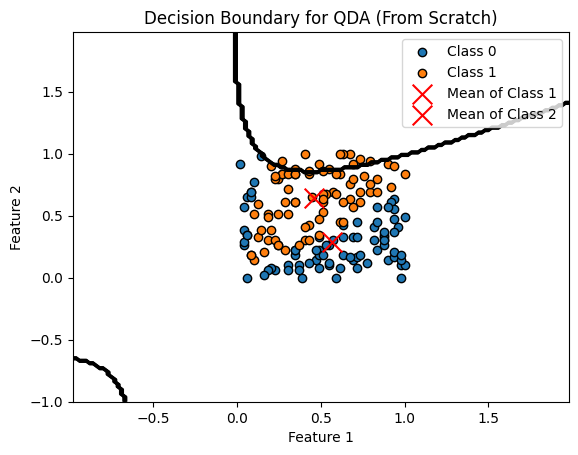

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, Y, predict_function, class_mapping, means):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Use the predict_function to get predictions for each point in the meshgrid
    predictions = np.array([predict_function(point) for point in grid_points])

    # Reshape the predictions to match the meshgrid shape
    Z = predictions.reshape(xx.shape)

    # Plot the decision boundary
    plt.contour(xx, yy, Z, colors='black')

    # Plot the data points
    for class_idx, class_label in class_mapping.items():
        plt.scatter(X[Y == class_label, 0], X[Y == class_label, 1], label=f'Class {class_label}', edgecolors='k')

    # Plot the means of each class
    for class_idx, mean in enumerate(means):
        plt.scatter(mean[0], mean[1], marker='x', s=200, c='red', label=f'Mean of Class {class_idx + 1}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary for QDA (From Scratch)')
    plt.legend()
    plt.show()

# Example usage:
plot_decision_boundary(X2_train, Y2_train, predict_class, class_mapping, means)


**Using Library function**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Read your dataset (assuming it has a header)
df = pd.read_csv('/content/data6.csv', header=None)

# Assuming the last column is the target variable
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda_model.fit(X_train, Y_train)

# Make predictions on the testing data
predictions = qda_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 85.00%
Confusion Matrix:
[[14  5]
 [ 1 20]]


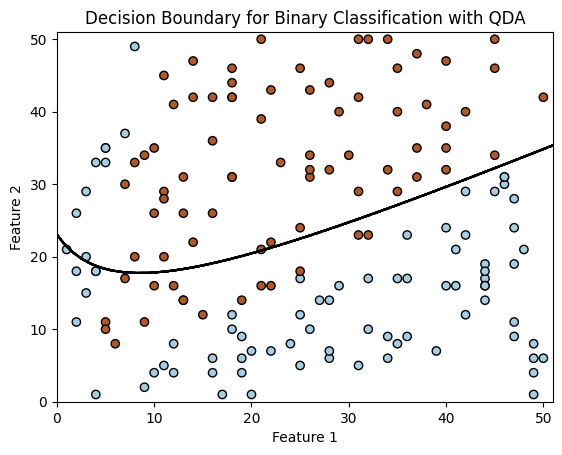

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Assume X_train is your training data and Y_train is the corresponding labels

# Initialize the QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda_model.fit(X_train, Y_train)

# Plot decision boundary
# Generate a meshgrid of points
h = .02  # Step size in the mesh
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the model to predict the class for each point in the meshgrid
Z = qda_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='black')

# Plot the data points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Binary Classification with QDA')
plt.show()


#**MULTI CLASS QDA**

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/data8.csv',header=None)
#normalised the data
for column in df.columns[0:3]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])


total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

In [ ]:
df

,0,1,2,3
0,0.162923,0.239951,0.507394,1
1,0.416518,0.379616,0.546216,1
2,0.474262,0.288765,0.596969,1
3,0.343824,0.541085,0.238435,1
4,0.300662,0.354829,0.481763,1
...,...,...,...,...
295,0.611769,0.510646,0.216702,3
296,0.353624,0.648424,0.367550,3
297,0.397710,0.350647,0.288159,3
298,0.492769,0.638981,0.396701,3


In [ ]:
np.unique(Y)

array([1, 2, 3])

In [ ]:
import numpy as np

def qda_multiclass(X_train, Y_train):
    # Adjust class labels to start from 0
    classes = np.unique(Y_train)
    class_mapping = {c: i for i, c in enumerate(classes)}
    Y_train_mapped = np.array([class_mapping[c] for c in Y_train])

    # Calculate parameters for each class
    n_classes = len(classes)

    means = [np.mean(X_train[Y_train_mapped == c], axis=0) for c in range(n_classes)]
    cov_matrices = [np.cov(X_train[Y_train_mapped == c], rowvar=False) for c in range(n_classes)]
    cov_invs = [np.linalg.inv(cov) for cov in cov_matrices]
    priors = [np.mean(Y_train_mapped == c) for c in range(n_classes)]

    # QDA implementation
    def quadratic_discriminant_function(x, class_idx):
        mean_diff = x - means[class_idx]
        cov_inv = cov_invs[class_idx]
        det_cov = np.linalg.det(cov_matrices[class_idx])

        quadratic_term = -0.5 * mean_diff.T.dot(cov_inv).dot(mean_diff)
        linear_term = mean_diff.T.dot(cov_inv).dot(means[class_idx])
        constant_term = -0.5 * means[class_idx].T.dot(cov_inv).dot(means[class_idx]) + 0.5 * np.log(det_cov)

        return quadratic_term + linear_term + constant_term + np.log(priors[class_idx])

    # Classification Rule
    def predict_class(x):
        class_scores = [quadratic_discriminant_function(x, i) for i in range(n_classes)]

        return np.argmax(class_scores)

    # Apply the classification rule to each sample in X_train
    predictions = np.array([predict_class(sample) for sample in X_train])

    # Calculate true positive (TP), true negative (TN), false positive (FP), false negative (FN) for each class
    TP = np.zeros(n_classes)
    TN = np.zeros(n_classes)
    FN = np.zeros(n_classes)
    FP = np.zeros(n_classes)

    for c in range(n_classes):
        TP[c] = np.sum((Y_train_mapped == c) & (predictions == c))
        TN[c] = np.sum((Y_train_mapped != c) & (predictions != c))
        FN[c] = np.sum((Y_train_mapped == c) & (predictions != c))
        FP[c] = np.sum((Y_train_mapped != c) & (predictions == c))

    # Print the results for each class
    for c in range(n_classes):
        print(f'Class {c + 1}:')
        print(f'True Positive: {TP[c]}, True Negative: {TN[c]}, False Positive: {FP[c]}, False Negative: {FN[c]}')
        print()




    print('True_positive=', TP)
    print('True_negative=', TN)
    print('False_negative=', FN)
    print('False_positive=', FP)

    return predictions, TP, TN, FN, FP, class_mapping, Y_train_mapped, means, predict_class

# Example usage:
predictions_multiclass, TP, TN, FN, FP, class_mapping_multiclass, Y_train_mapped_multiclass, means_multiclass, predict_class_multiclass = qda_multiclass(X_train, Y_train)


ValueError: ignored